In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ase.build import graphene
from abtem.reconstruct import RegularizedPtychographicOperator
import abtem

In [2]:
abtem.config.set({"device": "cpu"})

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Beam view'}, xlabel='x [Å]', ylabel='y [Å]'>)

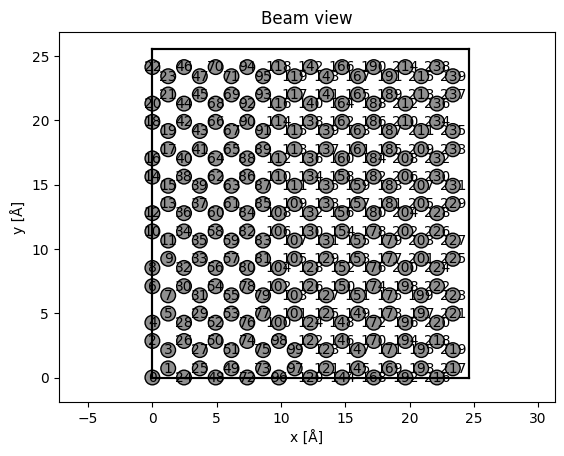

In [18]:
atoms = abtem.orthogonalize_cell(graphene(vacuum=2))

atoms *= (10, 6, 1)
abtem.show_atoms(atoms, title="Beam view", numbering=True, merge=False)

[########################################] | 100% Completed | 1.01 ss


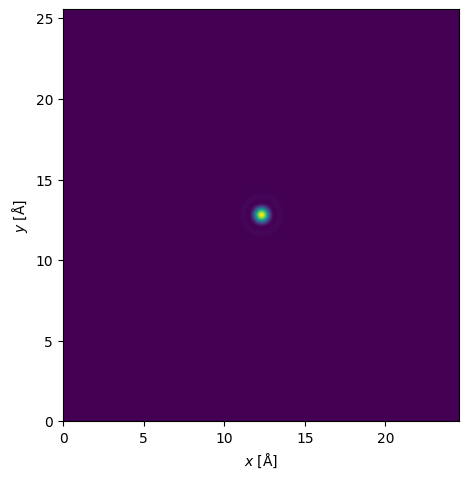

In [19]:
# Setup potential
potential = abtem.Potential(atoms, sampling=0.02)

# Setup probe
probe = abtem.Probe(energy=80e3, semiangle_cutoff=30)
probe.grid.match(potential)

probe.show()

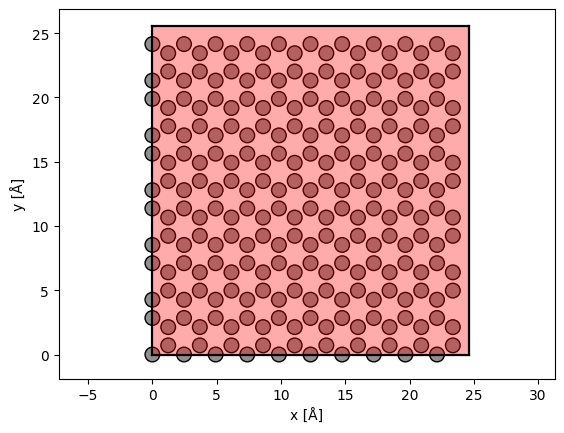

In [20]:
grid_scan = abtem.GridScan(
    start=(0, 0),
    end=(1, 1),
    sampling=probe.aperture.nyquist_sampling,
    fractional=True,
    potential=potential,
)

fig, ax = abtem.show_atoms(atoms)

grid_scan.add_to_plot(ax)


In [1]:
# detector = abtem.FlexibleAnnularDetector()
# flexible_measurement = probe.scan(potential, scan=grid_scan, detectors=detector)

# flexible_measurement.compute()

detector = abtem.PixelatedDetector()
measurements = probe.scan(potential, scan=grid_scan, detectors=detector)

measurements.array

NameError: name 'abtem' is not defined

In [22]:
measurements.compute()


[                                        ] | 0% Completed | 13.83 sms


KeyboardInterrupt: 

In [8]:
ptycho_operator = RegularizedPtychographicOperator(
    measurements,
    parameters={"object_px_padding": (0, 0)},
)

ptycho_operator.preprocess()

In [9]:
rpie_objects, rpie_probes, rpie_positions, rpie_sse = ptycho_operator.reconstruct(
    max_iterations=5, return_iterations=True, random_seed=1, verbose=True
)

Ptychographic reconstruction will perform the following steps:
--Regularized PIE for 6660 steps
--Probe correction is enabled
----Iteration 0, SSE = 8.030e-09
----Iteration 1, SSE = 1.953e-09
----Iteration 2, SSE = 4.729e-10
----Iteration 3, SSE = 2.463e-10
----Iteration 4, SSE = 1.569e-10


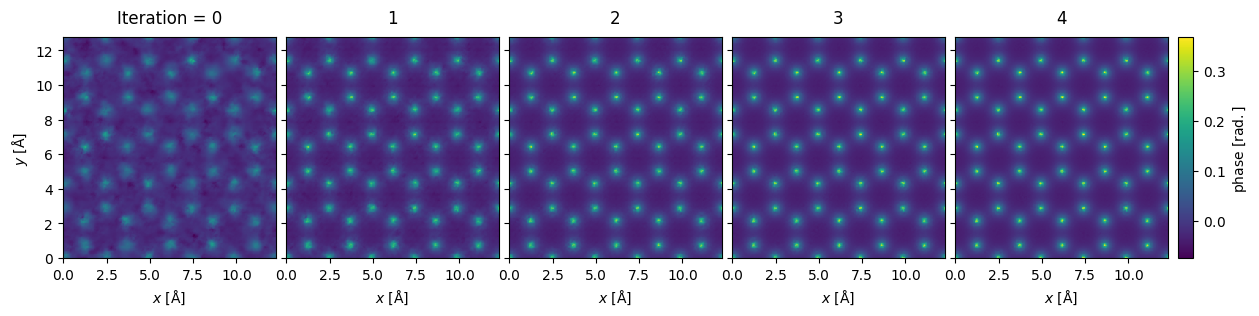

In [14]:
rpie_objects.phase().show(
    explode=True, figsize=(14, 5), cbar=True, common_color_scale=True
);

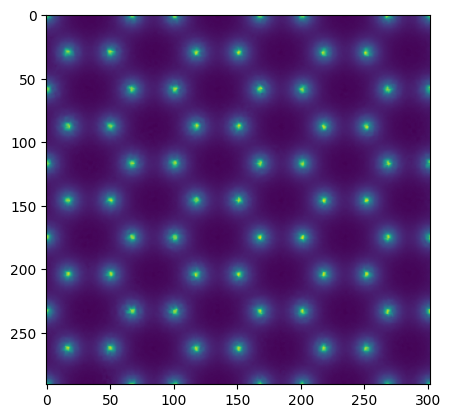

In [15]:
rpie_objects.phase()
import matplotlib.pyplot as plt
plt.imshow(rpie_objects.phase().array[4, :, :])

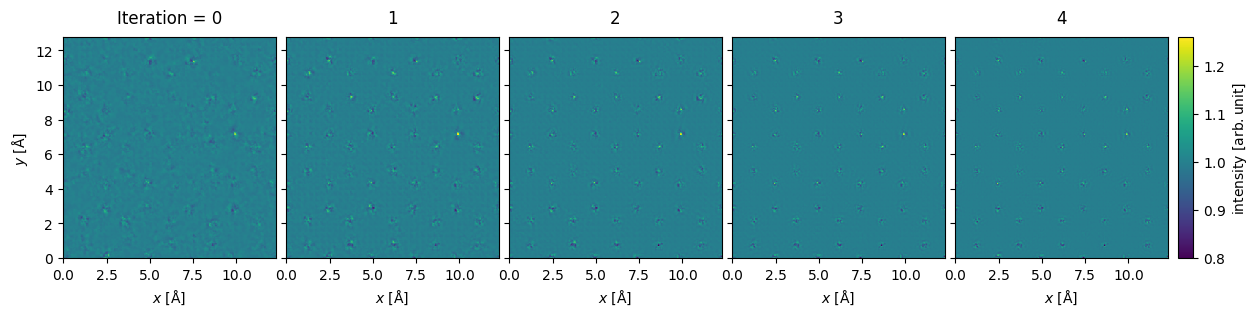

In [16]:
rpie_objects.intensity().show(
    explode=True, figsize=(14, 5), cbar=True, common_color_scale=True
);

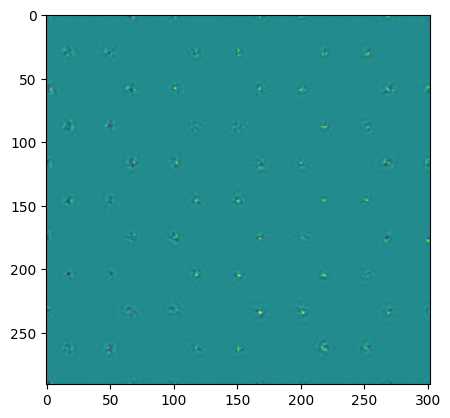

In [17]:
plt.imshow(rpie_objects.intensity().array[4, :, :])